# KAN med Iris blomsterdata
Idee hentet fra https://github.com/team-daniel/KAN/blob/master/KAN_classification.ipynb


In [52]:
from sklearn.datasets import load_iris
iris = load_iris()

# Beskrivelse av datasettet
petal = begerblad
sepal = stilkblad

## iris.target_names
Oversikt over det tre blomstertypene i datasettet. Kalles klasser, og oversettes til 0, 1 eller 2 i iris.target
np.ndarray(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## iris.target
Hver rad er en blomst, og kolonnen er hvilken klasse blomsten tilhører. 0, 1 eller 2

## iris.feature_names
Beskriver hva de fire kolonnene i iris.data er. ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

## iris.data
Hver rad er en blomst, og kolonnene er sepal length, sepal width, petal length og petal width.
150x4 numpy.ndarray.

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

***
# KAN

In [57]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import moviepy.video.io.ImageSequenceClip

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)

cpu


## Load Iris dataset for KAN training

In [58]:
def load_iris_dataset():
    # Load iris dataset
    iris = load_iris()
    data = iris.data
    target = iris.target

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.long)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, 4, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 4, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    return dataset

iris_dataset = load_iris_dataset()

## Oversette eller konvertere til Tensor
Se forklaring her https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
"A Tensor is just the PyTorch version of a NumPy array for holding data. "
For å kjøre predictions på en modellaget i PyTorch, må dataen oversettes til en Tensor.

In [59]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [60]:
data_tensor = torch.tensor(iris.data, dtype=torch.float32)
data_tensor

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

## Splitte datasettet i trenings- og testsett
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) deler datasettet i trenings- og testsett.
Se `train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

## Lage dataloaders
Den starter med å opprette tomme tensorer for train_inputs, train_labels, test_inputs og test_labels på en spesifisert enhet (f.eks. CPU eller GPU) somer lagret i variabelen device. Disse tensorene skal senere fylles med data fra trenings- og testsettet.

```
    train_inputs = torch.empty(0, 4, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 4, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)
```
Inputs:
train_inputs og test_inputs initialiseres med en form på (0, 4), noe som betyr at de har null rader og fire kolonner.
Labels:
train_labels og test_labels initialiseres med null elementer og dtype=torch.long, som vanligvis brukes for klasseetiketter.

### Fylle treningssettet
__Konsolidering av treningsdata:__
Den itererer gjennom train_loader, som er en dataloader for treningssettet. For hver batch av data (data) og etiketter (labels), konverteres disse til den spesifiserte enheten (device) og deretter konkateneres de med de eksisterende train_inputs og train_labels.
```
 train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
 # Concatenate all data into a single tensor on the specified device
 for data, labels in train_loader:
      train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
      train_labels = torch.cat((train_labels, labels.to(device)), dim=0)
```

* `data.to(device)` og `labels.to(device)` flytter batchen til den spesifiserte enheten.
* `torch.cat((train_inputs, data.to(device)), dim=0) konkatenerer den nye batchen med de tidligere dataene langs dimensjon 0 (rader).
* * dim=0 betyr at de nye dataene legges til i nye rader.

### Fylle testsettet
Skjer på samme måte som for treningssett


In [61]:
print("=== Datasett er delt i 120 treningsdata og 30 testdata ===")
print("Train data shape: {}".format(iris_dataset['train_input'].shape))
print("Train target shape: {}".format(iris_dataset['train_label'].shape))
print("Test data shape: {}".format(iris_dataset['test_input'].shape))
print("Test target shape: {}".format(iris_dataset['test_label'].shape))

=== Datasett er delt i 120 treningsdata og 30 testdata ===
Train data shape: torch.Size([120, 4])
Train target shape: torch.Size([120])
Test data shape: torch.Size([30, 4])
Test target shape: torch.Size([30])


## Eksempeldata
En enkelt blomst i datasettet kan se slik ut:

In [62]:
def print_example_data_point(dataset):
    # Get column names from the dataset
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    # Get a single data point from the dataset
    example_data_point = dataset['train_input'][0]

    # Get the corresponding target for the example data point
    example_target = int(dataset['train_label'][0])

    # Map numerical target to actual string label
    target_names = ['setosa', 'versicolor', 'virginica']
    actual_label = target_names[example_target]

    # Print column names and their corresponding values
    for i, column_name in enumerate(column_names):
        print(f"{column_name}: {example_data_point[i]}")

    # Print the target value and the actual string label
    print(f"Target (numerical): {example_target}")
    print(f"Actual Label: {actual_label}")

print_example_data_point(iris_dataset)

sepal_length: 4.599999904632568
sepal_width: 3.0999999046325684
petal_length: 1.5
petal_width: 0.20000000298023224
Target (numerical): 0
Actual Label: setosa


# Trene KAN
* in_vars representerer iris.feature_names, og kolonnenen i iris.data.
* out_vars representerer iris.target_names.

Directory already exists: ./model


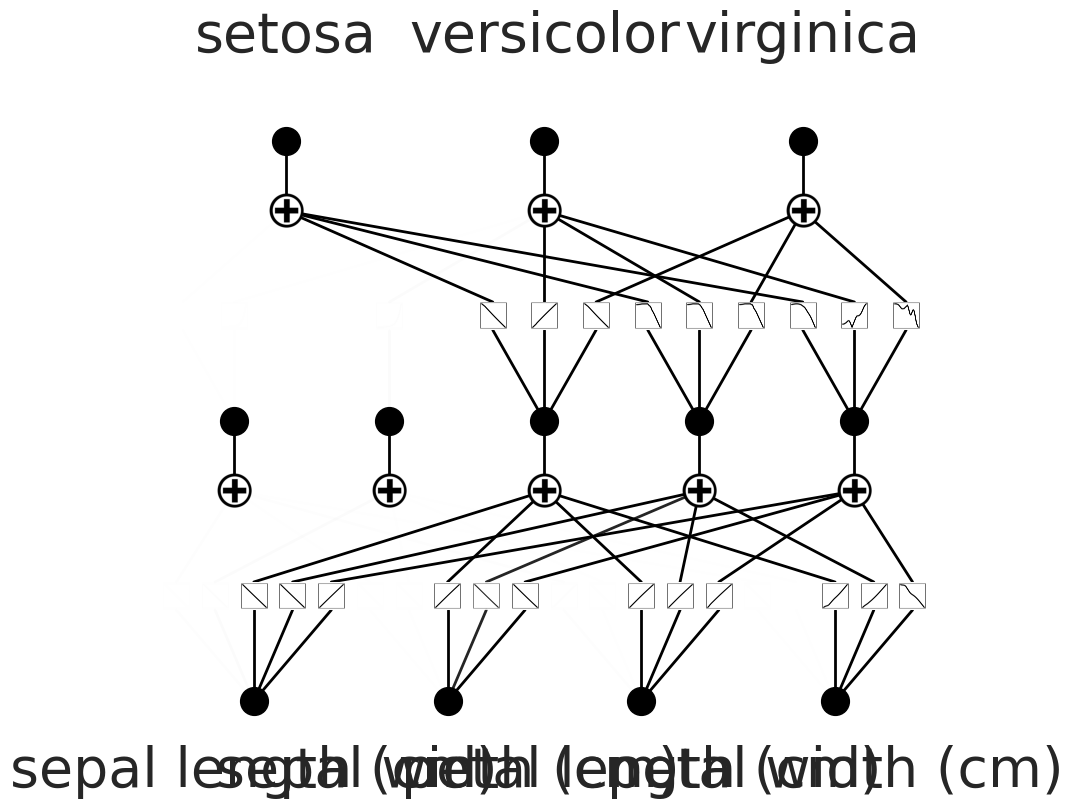

In [63]:
image_folder = 'video_img'

model = KAN(width=[4, 5, 3], grid=5, k=3, seed=0, device=device)

model(iris_dataset['train_input'])
in_vars = iris.feature_names
out_vars = [iris.target_names[0],iris.target_names[1],iris.target_names[2]]
model.plot(beta=100, scale=1, in_vars=in_vars, out_vars=out_vars)

Dette blir litt rotete, så vi forenkler labels på inngang og utgang.

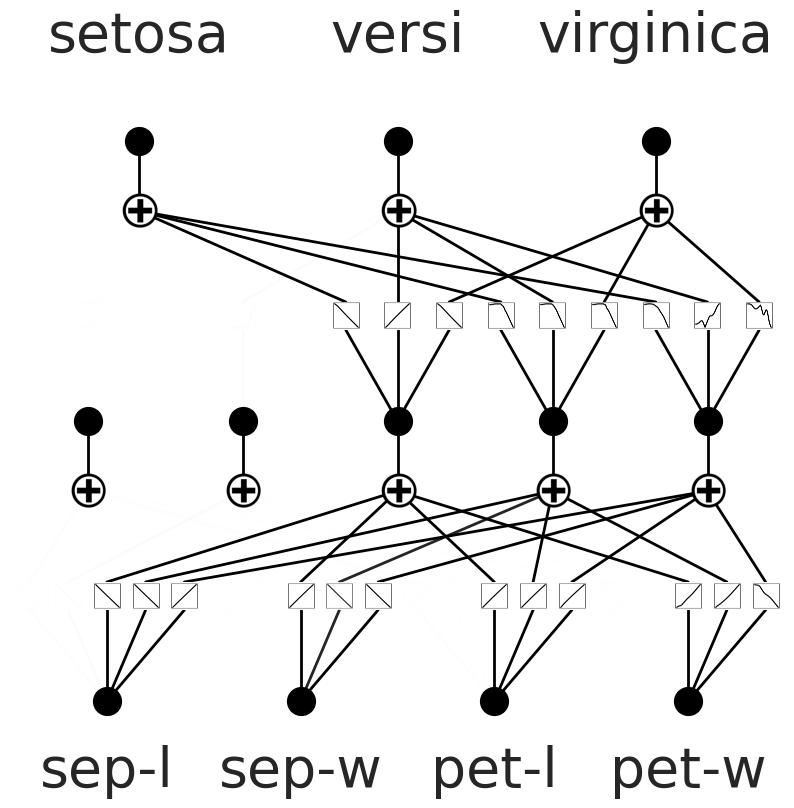

In [64]:

in_vars = ['sep-l', 'sep-w', 'pet-l', 'pet-w']
out_vars = ['setosa', 'versi', 'virginica']
model.plot(beta=100, scale=1, in_vars=in_vars, out_vars=out_vars)

### Beskrive test og treningspresisjon

In [65]:
def train_acc():
    return torch.mean((torch.argmax(model(iris_dataset['train_input']), dim=1) == iris_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(iris_dataset['test_input']), dim=1) == iris_dataset['test_label']).float())

### Trene modellen

In [66]:
results = model.train(iris_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=50, lamb=0.01, lamb_entropy=10., save_fig=True, img_folder=image_folder)


train loss: 2.67e-01 | test loss: 1.94e-01 | reg: 1.01e+02 : 100%|██| 50/50 [04:15<00:00,  5.11s/it]


In [67]:
results['train_acc'][-1], results['test_acc'][-1]

(0.9666666388511658, 1.0)

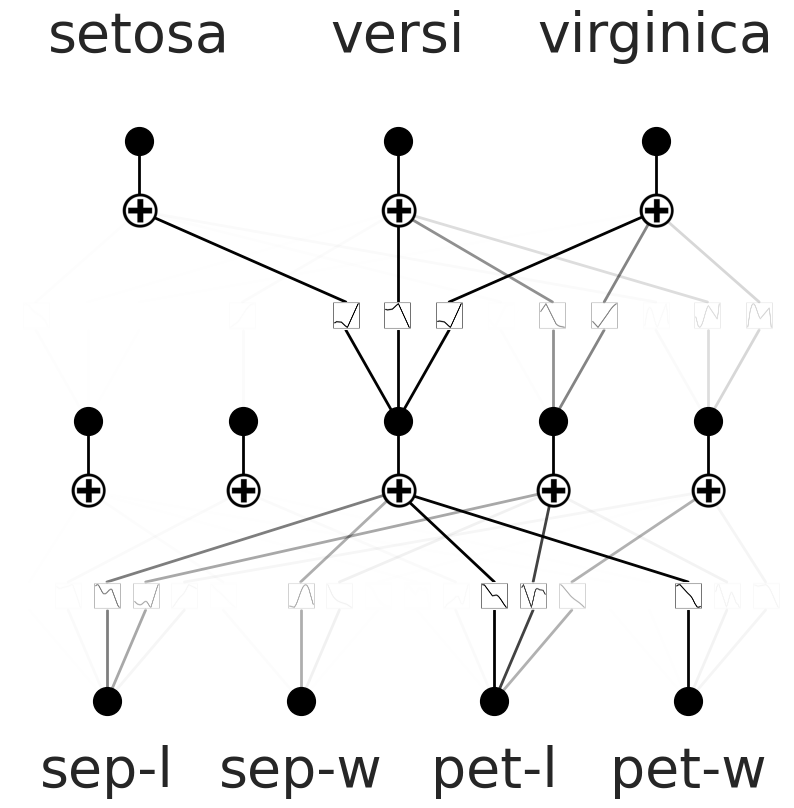

In [68]:

model.plot(scale=1, in_vars=in_vars, out_vars=out_vars)

Effektivisere modellen

In [69]:
# model = model.prune()
# model(iris_dataset['train_input'])
# model.plot(scale=1, in_vars=in_vars, out_vars=out_vars)

***
# Prediksjon

In [70]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row_tensor = torch.tensor([row], dtype=torch.float32).to(device)  # Convert list to tensor
    predict_inputs = torch.empty(0, 4, device=device)
    predict_inputs = torch.cat((predict_inputs, row_tensor), dim=0)  # Concatenate tensors
    # make prediction
    yhat = model(row_tensor)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

def prediction_result(expected, yhat):
    for target_name in iris.target_names:
        print(f"{target_name}: {yhat[0][iris.target_names.tolist().index(target_name)]}")
    print(f"Expected: {expected}")

Lag en rad med data for en blomst, og prediker hvilken klasse blomsten tilhører.
sep-l: 6.3
sep-w: 2.7
pet-l: 4.9
pet-w:1.8
Forventet familie: virginica

In [71]:
row = [6.3, 2.7, 4.9, 1.8]
yhat = predict(row, model)
prediction_result('virginica', yhat)

setosa: -31.04930877685547
versicolor: 2.1533377170562744
virginica: 4.304663181304932
Expected: virginica


/home/baardl/.local/lib/python3.11/site-packages/kan/MultKAN.py:329: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/home/baardl/.local/lib/python3.11/site-packages/kan/MultKAN.py:339: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/home/baardl/.local/lib/python3.11/site-packages/kan/MultKAN.py:340: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  output_range_spline = torch.

### Virginica

In [72]:
row = [6.7,3.1,4.7,1.5]
yhat = predict(row, model)
prediction_result('virginica', yhat)

setosa: -37.70482635498047
versicolor: 4.9633026123046875
virginica: 2.1032118797302246
Expected: virginica


### Setosa

In [73]:
row = [5.0,3.4,1.6,0.4]
yhat = predict(row, model)
prediction_result('setosa', yhat)

setosa: 52.88494110107422
versicolor: -20.147476196289062
virginica: 17.81758689880371
Expected: setosa


### Versicolor

In [74]:
row = [5.0,2.0,3.5,1.0]
yhat = predict(row, model)
prediction_result('versicolor', yhat)

setosa: -38.58364486694336
versicolor: 10.456815719604492
virginica: -0.961245059967041
Expected: versicolor
